## Observation Model Theory <a class="anchor" id="observation-model"></a>

A large portion of super-resolution solutions set up the problem as a set of linear equations. The relationship between the target high-resolution image and the low-resolution frames is related as a combination of linear operators. Some variation of the following equations are proposed. For this explanation the equations are taken from this paper [[1]](#http://www.ifp.illinois.edu/~jyang29/papers/chap1.pdf):


\begin{align}
\newline
Y_k = D_kH_kF_k\textbf{X} + N_k, k = 1,2...K 
\newline
\newline
\end{align}


\begin{align}
\textbf{X} \text{ - High-resolution image}\newline
Y_k \text{ - kth low-resolution frame}\newline
D_k \text{- Decimation Operator}\newline
H_k \text{- Blurring Operator}\newline
F_k \text{- Motion Information}\newline
N_k \text {- Noise Term}\newline
\end{align}

Essentially the model tries to represent the degradation effects and hardware limitations of the captured image through three different operators. The _k_ number of operators for the low-resolution images are stacked to form:

\begin{align}
\newline
\newline
\end{align}

\begin{equation}
  \begin{pmatrix}
    Y_1\\
    Y_2\\
    \cdots\\
    \cdots\\
    Y_K
 \end{pmatrix}
 =
  \begin{pmatrix}
    D_1H_1F_1\\
    D_2H_2F_2\\
    \cdots\\
    \cdots\\
    D_KH_KF_K
  \end{pmatrix}  \textbf{X} + \underline{N}
\end{equation}

Which is equivalent to

\begin{align}
\newline
\underline{Y} = \textit{A}\textbf{X} + \underline{N}
\newline
\newline
\end{align}

Where _A_ is a matrix of the stacked operators. Ignoring the noise term this can be written as 

\begin{align}
\newline
\underline{Y} = \textit{A}\textbf{X}
\newline
\newline
\end{align}

Which is equivalent to the classical linear system

\begin{align}
\newline
\textit{A}x = \bar{b}
\newline
\newline
\end{align}


Where *A* is the sparse operator representing decimation, blur, and motion. *X* is the target high-resolution image, and *b* is the set of low-resolution frames in vector form.

The issue is there is very little information on how to represent each of the linear operators *D* *H* and *F*. In the end, I found this paper [[2]](#http://users.wfu.edu/plemmons/papers/siam_maa3.pdf) which help me put together the decimation matrix and pointed me in the right direction for the blur matrix. The decimation matrix is a diagonal block [Toeplitx matrix](https://en.wikipedia.org/wiki/Toeplitz_matrix) as described in section A.1 in the paper. The blur matrix is constructed as a block Toeplitz matrix of Toeplitz blocks. I ended up digging a little further, and found an open source example [[3]](#http://scholar.sun.ac.za/handle/10019.1/5189) on how to build the blur matrix. An excellent example of a transformation matrix through bilinear interpolation was provided in the book Elegant Scipy and can be seen [here](https://github.com/elegant-scipy/elegant-scipy/blob/master/markdown/ch5.markdown)

Since the operators can be very difficult to picture, I included some examples below.

The target high-resolution image **_X_** is flattened into a vector and multiplied by each matrix. When multiplied with *D* the image is subsampled by a given factor. When multiplied with *F* the image goes through a homogeneous transformation. When multiplied by *H* the image is convolved with a given kernel. In the case of this project, the operator *H* is not applied. We are working with the special case where the high-resolution target is the PSF.


## Iterative Approaches <a class="anchor" id="iterative"></a>

References

[ 1 ] : http://www.ifp.illinois.edu/~jyang29/papers/chap1.pdf (sect. 1.3.1)

[ 2 ] : http://users.wfu.edu/plemmons/papers/siam_maa3.pdf (sect. A.1, A.3)

[ 3 ] : http://scholar.sun.ac.za/handle/10019.1/5189 ( sect. 7.2)

[ 4 ] : http://www.cse.huji.ac.il/course/2003/impr/supres-cvgip-gm91.pdf



### Sample Operators

Sample Blur Operator (25x25 image and 5x5 PSF)


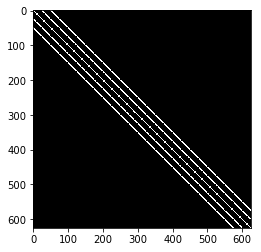

Transformation Operator w/ shift of (10, 10) on 100x100 image


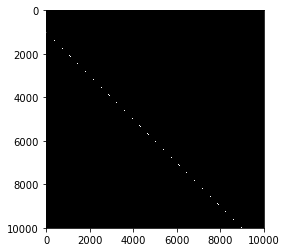

Sample Decimation Operator (10x10 image and Downsample Factor of 2)


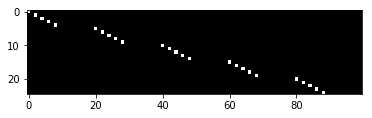

In [2]:
import sys
sys.path.insert(0, "../src/")
sys.path.insert(0, "../orex/")
from matplotlib import pyplot as plt
from linear_operator import decimation_matrix, transformation_matrix, blur_matrix
import numpy as np

psf = np.ones((5, 5)) / 25

H = np.array([
    [1, 0, 10],
    [0, 1, 10],
    [0, 0, 1]
])

blur_mat = blur_matrix(25, 25, psf)
tf_mat = transformation_matrix(H, (100, 100))
dec_mat = decimation_matrix(10, 10, downsample_factor=2)

print("Sample Blur Operator (25x25 image and 5x5 PSF)")
plt.imshow(blur_mat.toarray(), cmap='gray')
plt.show()

print("Transformation Operator w/ shift of (10, 10) on 100x100 image")
plt.imshow(tf_mat.toarray(), cmap='gray')
plt.show()

print("Sample Decimation Operator (10x10 image and Downsample Factor of 2)")
plt.imshow(dec_mat.toarray(), cmap='gray')
plt.show()

## LSQR

### Synthetic Results

### NavCam Results

## Gradient Descent

### Synthetic Results

### NavCam Results

## Irani Peleg MLE

### Synthetic Results

### NavCam Results